In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


# Створемо клас для обробки зображення
class ImageProcessor:
    def __init__(self, image_path):
        self.image = cv2.imread(image_path) # Зчитування зображення з диску

    # Функція для відображення зображення    
    def show_image(self):
        plt.imshow(cv2.cvtColor(self.image, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.show()

    # Фільтр Собеля   
    def sobel_filter(self):
        
        # перетворемо зображення на відтінки сірого
        gray = cv2.cvtColor(self.image, cv2.COLOR_BGR2GRAY)
        
        # обчислюємо градієнти по осях x та y відповідно
        sobel_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
        sobel_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
        
        # обчислюємо величину та орієнтацію градієнта
        gradient_magnitude = np.sqrt(sobel_x**2 + sobel_y**2)
        gradient_magnitude *= 255.0 / gradient_magnitude.max()

        plt.imshow(gradient_magnitude, cmap='gray')
        plt.axis('off')
        plt.show()
                      
    # Медіанний фільтр     
    def median_filter(self, kernel_size=3):
        median_filt = cv2.medianBlur(self.image, 5)
        plt.imshow(cv2.cvtColor(median_filt, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.show()
    
    # Порівняння фільтрів - Собеля та медіанного
    def compare_filters(self, path):
        gray = cv2.cvtColor(self.image, cv2.COLOR_BGR2GRAY)
        sobel_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
        sobel_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
        gradient_magnitude = np.sqrt(sobel_x**2 + sobel_y**2)
        gradient_magnitude *= 255.0 / gradient_magnitude.max()

        median_filtered = cv2.medianBlur(self.image, 5)

        fig, axes = plt.subplots(1, 3, figsize=(12, 4))
        axes[0].imshow(cv2.cvtColor(self.image, cv2.COLOR_BGR2RGB))
        axes[0].axis('off')
        axes[0].set_title('Оригинальне зображення')
        axes[1].imshow(gradient_magnitude, cmap='gray')
        axes[1].axis('off')
        axes[1].set_title('Фільтр Собеля')
        axes[2].imshow(cv2.cvtColor(median_filtered, cv2.COLOR_BGR2RGB))
        axes[2].axis('off')
        axes[2].set_title('Медіанний фільтр')
        plt.show()    

Введіть шлях до зображення: C:\Users\Asus\PycharmProjects\59\1.jpg


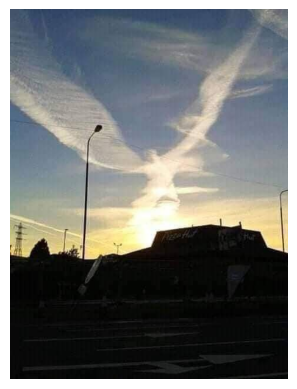

In [2]:
# Приклад використання
image_path = input("Введіть шлях до зображення: ")
image_processor = ImageProcessor(image_path)
image_processor.show_image()

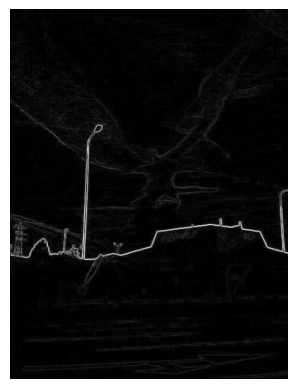

In [3]:
# Застосування фільтра Собеля та показ результату
image_processor.sobel_filter()

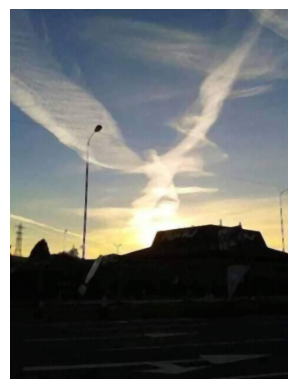

In [4]:
# Застосування медіанного фільтру та показ результату
image_processor.median_filter()

Введіть шлях до зображенння для порівняння: C:\Users\Asus\PycharmProjects\59\1.jpg


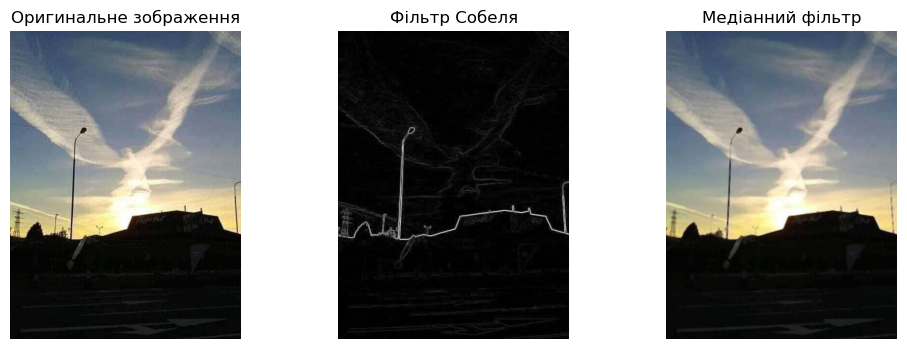

In [5]:
# Порівняння результатів фільтрів Собеля та медіанного фільтру
comparison_image_path = input("Введіть шлях до зображенння для порівняння: ")
image_processor.compare_filters(comparison_image_path)

In [7]:
# Бачимо що фільтр Собеля виділяє контури об'єктів зображення, 
# медіанний фільтр трішки зглажує зображення та видаляє невиличкі подряпини, 'соляні шуми'. 